In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [93]:
Temperature = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
Temperature.head(20)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [94]:
Temperature.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [95]:
Temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [96]:
Temperature.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

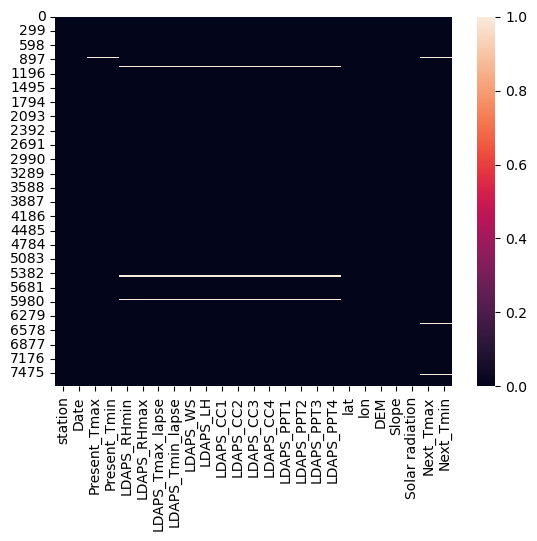

In [97]:
sns.heatmap(Temperature.isnull())

In [98]:
Temperature.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [99]:
Temperature.shape

(7752, 25)

my observations on these data are:
    column station is not needed as this just show the serial number of the dataset which i am going to replace the index with the date column
    

In [100]:
for i in Temperature.columns:
    print(Temperature[i].value_counts())
    print('\n*******\n')

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

*******

30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64

*******

31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64

*******

24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64

*******

19.794666    2
71.658089    2
77.030350    2
98.524

In [101]:
Temperature = Temperature.drop(columns=['station'])
Temperature


,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


filling the NAN values in the date and then convert to datetime form from object and set as index

In [102]:
Temperature['Date']=Temperature['Date'].fillna(Temperature['Date'].mode()[0])

In [103]:
Temperature['Date'].isnull().sum()

0

now the null value solve. converting to datetime and setting as index

In [104]:
Temperature['Date'] = pd.to_datetime(Temperature['Date'])
Temperature.set_index('Date', inplace = True)

In [105]:
Temperature.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [106]:
for i in Temperature.columns:
     Temperature[i]=Temperature[i].fillna(Temperature[i].mean())
        

In [107]:
Temperature.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:ylabel='Date'>

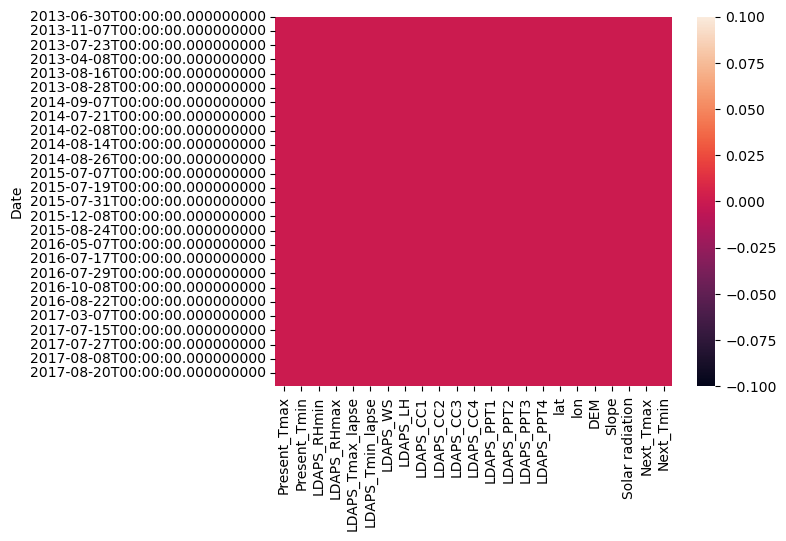

In [108]:
sns.heatmap(Temperature.isnull())

Now all the null values filled.

In [109]:
Temperature.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [110]:
Features = Temperature.drop(columns = ['Next_Tmax'])
Label = Temperature['Next_Tmax']

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif

In [112]:
best_features = SelectKBest(score_func = f_classif, k = 10)
fit = best_features.fit(Features,Label)
Temperature_scores = pd.DataFrame(fit.scores_)
Temperature_columns = pd.DataFrame(Features.columns)
features_scores = pd.concat([Temperature_columns, Temperature_scores], axis = 1)
features_scores.columns = ['Features_name', 'Score']
print(features_scores.nlargest(10, 'Score'))

       Features_name      Score
4   LDAPS_Tmax_lapse  94.924571
21         Next_Tmin  29.648179
0       Present_Tmax  27.427356
5   LDAPS_Tmin_lapse  25.914083
10         LDAPS_CC3  18.373125
9          LDAPS_CC2  15.556879
1       Present_Tmin  14.975696
11         LDAPS_CC4  13.960009
8          LDAPS_CC1  13.108425
2        LDAPS_RHmin  12.156345


In [113]:
Temperature_new= Temperature[['LDAPS_Tmax_lapse','Next_Tmin','Present_Tmax','LDAPS_Tmin_lapse','LDAPS_CC3','LDAPS_CC2','Present_Tmin','LDAPS_CC4']]
Temperature_new.head()

,LDAPS_Tmax_lapse,Next_Tmin,Present_Tmax,LDAPS_Tmin_lapse,LDAPS_CC3,LDAPS_CC2,Present_Tmin,LDAPS_CC4
Date,,,,,,,,
2013-06-30,28.074101,21.2,28.7,23.006936,0.161697,0.203896,21.4,0.130928
2013-06-30,29.850689,22.5,31.9,24.035009,0.159444,0.251771,21.6,0.127727
2013-06-30,30.091292,23.9,31.6,24.565633,0.204091,0.257469,23.3,0.142125
2013-06-30,29.704629,24.3,32.0,23.326177,0.161157,0.226002,23.4,0.134249
2013-06-30,29.113934,22.5,31.4,23.486480,0.178892,0.249995,21.9,0.170021


In [114]:
Temperature_new.describe()

,LDAPS_Tmax_lapse,Next_Tmin,Present_Tmax,LDAPS_Tmin_lapse,LDAPS_CC3,LDAPS_CC2,Present_Tmin,LDAPS_CC4
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.613447,22.932220,29.768211,23.512589,0.318404,0.356080,23.225059,0.299191
std,2.932898,2.483276,2.956557,2.333973,0.249148,0.256810,2.403036,0.253114
min,17.624954,11.300000,20.000000,14.272646,0.000000,0.000000,11.300000,0.000000
25%,27.693091,21.400000,27.800000,22.114651,0.103100,0.142328,21.700000,0.082741
50%,29.662273,23.100000,29.900000,23.735942,0.265264,0.315667,23.400000,0.232354
75%,31.683819,24.600000,32.000000,25.134000,0.494007,0.554963,24.900000,0.497230
max,38.542255,29.800000,37.600000,29.619342,0.983789,0.968353,29.900000,0.974710


since the data contains no null values, i proceed by standardising the new dataset

In [115]:
scaler = StandardScaler()
Temperature_New = pd.DataFrame(scaler.fit_transform(Temperature_new),columns = Temperature_new.columns)
Temperature_New.head(8)

,LDAPS_Tmax_lapse,Next_Tmin,Present_Tmax,LDAPS_Tmin_lapse,LDAPS_CC3,LDAPS_CC2,Present_Tmin,LDAPS_CC4
0,-0.524889,-0.697599,-0.361326,-0.216663,-0.629013,-0.592636,-0.759529,-0.664815
1,0.080895,-0.174064,0.721084,0.223848,-0.638055,-0.406199,-0.676296,-0.677462
2,0.162936,0.389744,0.619608,0.451210,-0.458843,-0.384009,0.031188,-0.620575
3,0.031092,0.550832,0.754909,-0.079874,-0.631178,-0.506548,0.072805,-0.651696
4,-0.170325,-0.174064,0.551957,-0.011187,-0.559990,-0.413115,-0.551446,-0.510358
5,-0.134382,0.430016,0.721084,0.132840,-0.343444,-0.293086,0.114422,-0.603832
6,-0.361982,0.188384,0.551957,0.311026,-0.192609,-0.087660,0.488972,-0.606430
7,-0.259646,-0.012976,0.788735,0.131315,-0.184708,-0.043429,0.156038,-0.613798


In [116]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Temperature_New.values, i) for i in range(len(Temperature_New.columns))]
vif['features'] = Temperature_New.columns

In [117]:
vif

,vif values,features
0,4.267455,LDAPS_Tmax_lapse
1,5.384290,Next_Tmin
2,2.115826,Present_Tmax
3,6.522993,LDAPS_Tmin_lapse
4,4.559148,LDAPS_CC3
5,2.981481,LDAPS_CC2
6,3.152945,Present_Tmin
7,2.757312,LDAPS_CC4


there is no issue of multiculinearity in the selected features. i proceed splitting the data and building the model

In [118]:
Temperature['Next_Tmax'].nunique()

184

In [119]:
Temperature_New.head()

,LDAPS_Tmax_lapse,Next_Tmin,Present_Tmax,LDAPS_Tmin_lapse,LDAPS_CC3,LDAPS_CC2,Present_Tmin,LDAPS_CC4
0,-0.524889,-0.697599,-0.361326,-0.216663,-0.629013,-0.592636,-0.759529,-0.664815
1,0.080895,-0.174064,0.721084,0.223848,-0.638055,-0.406199,-0.676296,-0.677462
2,0.162936,0.389744,0.619608,0.451210,-0.458843,-0.384009,0.031188,-0.620575
3,0.031092,0.550832,0.754909,-0.079874,-0.631178,-0.506548,0.072805,-0.651696
4,-0.170325,-0.174064,0.551957,-0.011187,-0.559990,-0.413115,-0.551446,-0.510358


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [121]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(Temperature_New,Label,test_size = .30, random_state = i)
    Lr = LinearRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.7844275236306848 
 random state =  40


In [122]:
x_train,x_test,y_train,y_test = train_test_split(Temperature_New,Label, test_size = 0.30, random_state = MaxRS)

In [123]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8797478253878473
R2 score on training Data: 0.98129080435954
Mean absolute Error: 0.8308327403462197
Mean squared Error: 1.203659927042556
Root mean squared Error: 1.0971143637025977


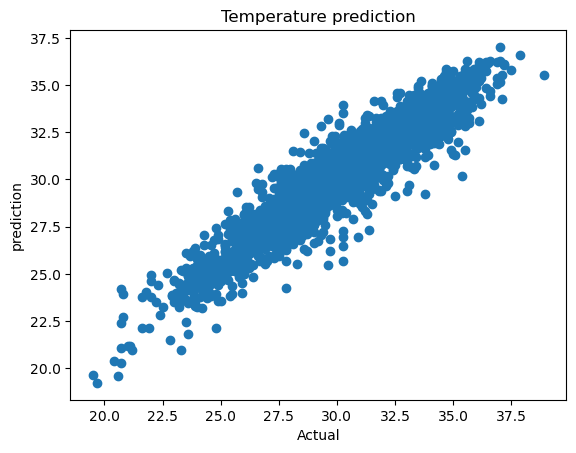

In [124]:
plt.scatter(y_test,pred_rfr)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [125]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_rfr))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_rfr))
print ('Mean squared Error:', mean_squared_error(y_test,pred_rfr))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.8796216563524935
R2 score on training Data: 0.9813649731489673
Mean absolute Error: 0.8330171159288414
Mean squared Error: 1.204922811579812
Root mean squared Error: 1.0976897610799747


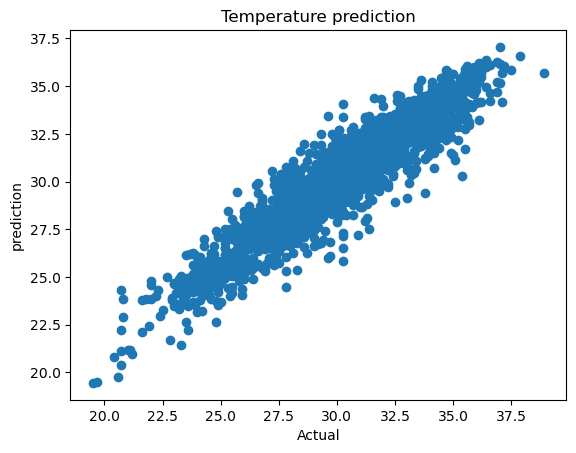

In [126]:
plt.scatter(y_test,pred_rfr)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [127]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_lasso))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_lasso))
print ('Mean squared Error:', mean_squared_error(y_test,pred_lasso))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: 0.5863288826483919
R2 score on training Data: 0.5709925515032934
Mean absolute Error: 1.6302354577332945
Mean squared Error: 4.140626550305476
Root mean squared Error: 2.034852955450461


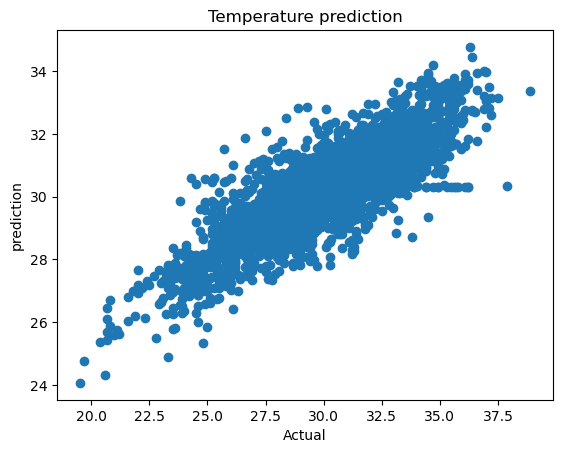

In [128]:
plt.scatter(y_test,pred_lasso)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [129]:
Ada = AdaBoostRegressor()
Ada.fit(x_train,y_train)
pred_Ada = Ada.predict(x_test)
pred_train = Ada.predict(x_train)
print ('R2 score:', r2_score(y_test,pred_Ada))
print ('R2 score on training Data:',r2_score(y_train,pred_train))
print ('Mean absolute Error:', mean_absolute_error(y_test,pred_Ada))
print ('Mean squared Error:', mean_squared_error(y_test,pred_Ada))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,pred_Ada)))

R2 score: 0.7513823602830125
R2 score on training Data: 0.7417674204703841
Mean absolute Error: 1.2764626713578437
Mean squared Error: 2.488529550907593
Root mean squared Error: 1.5775073853733912


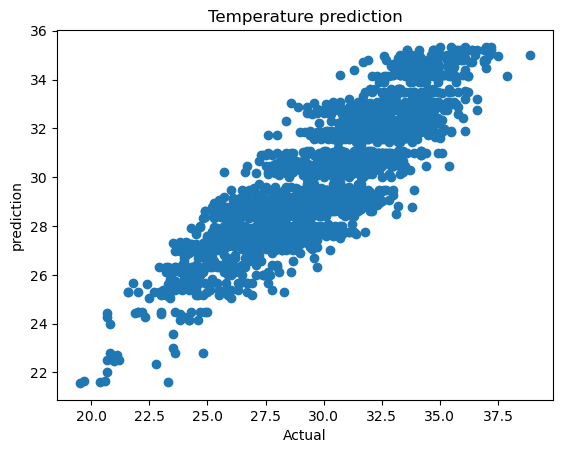

In [130]:
plt.scatter(y_test,pred_Ada)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Temperature prediction')
plt.show()

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
score1 = cross_val_score(rfr,Temperature_New,Label,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(r2_score(y_test,pred_rfr)-score1.mean()))

[0.62415309 0.62837485 0.62024375 0.81118769 0.65954454]
0.6687007850554754
difference = 0.2109208712970181


In [133]:
score2 = cross_val_score(lasso,Temperature_New,Label,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(r2_score(y_test,pred_lasso)-score2.mean()))

[0.50545477 0.52996232 0.57099867 0.50824963 0.58895603]
0.5407242809844386
difference = 0.045604601663953304


In [134]:
score3 = cross_val_score(Ada,Temperature_New,Label,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(r2_score(y_test,pred_Ada)-score3.mean()))

[0.62610249 0.61074158 0.59909295 0.78544747 0.64972548]
0.6542219945626864
difference = 0.09716036572032616


my best model to hper tune for final model building is the Lasso because this has the lowest difference of accuracy score and cross validation 

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
params_grid = {'alpha':[2.0,5.6,7.0,15.5],
             'fit_intercept': [ True, False],
             'copy_X':[True, False],
             'max_iter':[2,50,70,4,200,250],
              'positive':[True,False]
             }

In [137]:
grid_search =GridSearchCV(estimator=lasso, param_grid = params_grid, cv = 5)

In [138]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [2.0, 5.6, 7.0, 15.5],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [2, 50, 70, 4, 200, 250],
                         'positive': [True, False]})

In [139]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'alpha': 2.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 2, 'positive': True}


In [140]:
lasso_final = Lasso(alpha= 2.0, copy_X= True, fit_intercept= True, max_iter = 2, positive = True)

In [141]:
lasso_final

Lasso(alpha=2.0, max_iter=2, positive=True)

In [142]:
lasso_final.fit(x_train,y_train)
my_prediction = lasso_final.predict(x_test)
print ('R2 score:', r2_score(y_test,my_prediction))
print ('Mean absolute Error:', mean_absolute_error(y_test,my_prediction))
print ('Mean squared Error:', mean_squared_error(y_test,my_prediction))
print ('Root mean squared Error:', np.sqrt(mean_squared_error(y_test,my_prediction)))

R2 score: 0.2563217856033033
Mean absolute Error: 2.2062713479881713
Mean squared Error: 7.443821021706533
Root mean squared Error: 2.7283366767513377


In [143]:
import joblib
import pickle
filename = 'min_temp.pkl'
pickle.dump(lasso_final,open(filename,'wb'))

In [144]:
import pickle
loaded_lasso_final=pickle.load(open(filename,'rb'))
result = loaded_lasso_final.score(x_test,y_test)
print(result*100)

25.63217856033033
